In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

### 1. Load the data into the pandas environment and identify some basic details of the dataset.

In [2]:
# Loading and reading data
data= pd.read_csv('employee.csv')
data

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
5,Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
6,James Authur,54.0,NaN,F,Operations,G3,53
7,Josh Wills,54.0,52000.0,F,Finance,G3,901
8,Leo Duck,23.0,98000.0,M,Sales,G4,709


In [3]:
# Checking number of rows and columns
data.shape

(9, 7)

In [4]:
# Checking the basic informations 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [5]:
# Checking the null values
data.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

### 2. Reset the index as "name".

In [6]:
# Reset "name" as index
dataIndexChange= data.set_index("name")
dataIndexChange

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 3. Select rows for specific names Jack Morgan and Josh wills.

In [7]:
# Find rows of specific names
dataIndexChange.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


### 4. Select data for multiple values "Sales" and “Finance”.

In [8]:
# Find data for sales and finance
dataIndexChange.loc[dataIndexChange['department'].isin(['Sales','Finance'])]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 5. Display employee who has more than 700 performance score.

In [9]:
Score_700= dataIndexChange['performance_score']>700
dataIndexChange.loc[Score_700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


### 6. Display employee who has more than 500 and less than 700 performance score

In [10]:
Score_500_700= (dataIndexChange['performance_score']<700) & (dataIndexChange['performance_score']>500)
dataIndexChange.loc[Score_500_700]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


### 7. Check and handle missing values in the dataset.

In [11]:
dataIndexChange.isnull().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [12]:
# Handling the NaN in age using median
dataIndexChange['age']=dataIndexChange['age'].fillna(dataIndexChange['age'].median())

# Handling the Nan in income using mean
dataIndexChange['income']= dataIndexChange['income'].fillna(dataIndexChange['income'].mean())

# Handling the NaN in gender using mode
dataIndexChange['gender']= dataIndexChange['gender'].fillna(dataIndexChange['gender'].mode()[0])
dataIndexChange

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52857.142857,F,Operations,G3,723
S Kumar,45.0,16000.000000,F,Finance,G0,520
Jack Morgan,32.0,35000.000000,M,Finance,G2,674
Ying Chin,45.0,65000.000000,F,Sales,G3,556
Dheeraj Patel,30.0,42000.000000,F,Operations,G2,711
Satyam Sharma,45.0,62000.000000,F,Sales,G3,649
James Authur,54.0,52857.142857,F,Operations,G3,53
Josh Wills,54.0,52000.000000,F,Finance,G3,901
Leo Duck,23.0,98000.000000,M,Sales,G4,709


In [13]:
dataIndexChange.isnull().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

### 8. Check the outliers and handle outliers in performance score using Percentiles.

<AxesSubplot:xlabel='performance_score'>

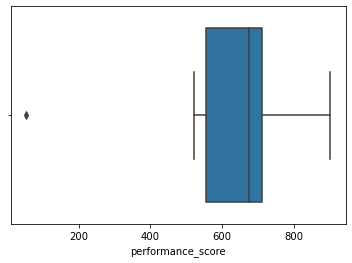

In [14]:
# Check for outliers using boxplot
sns.boxplot(dataIndexChange['performance_score'])

In [20]:
Q1=np.percentile(dataIndexChange['performance_score'],25,interpolation='midpoint')
Q2=np.percentile(dataIndexChange['performance_score'],50,interpolation='midpoint')
Q3=np.percentile(dataIndexChange['performance_score'],75,interpolation='midpoint')
print("Q1: ",Q1)
print("Q2: ",Q2)
print("Q3: ",Q3)
IQR = Q3-Q1
print("IQR: ",IQR)
upperLimit=Q3+1.5*IQR
lowerLimit=Q1-1.5*IQR
print('UPPER LIMIT: ',upperLimit)
print('LOWER LIMIT: ',lowerLimit)
outlier=[]
for i in dataIndexChange['performance_score']:
    if((i>upperLimit) | (i<lowerLimit)):
        outlier.append(i)
print("Outlier: ",outlier)

Q1:  556.0
Q2:  674.0
Q3:  711.0
IQR:  155.0
UPPER LIMIT:  943.5
LOWER LIMIT:  323.5
outlier:  [53]


In [16]:
# Locate the outlier row
dataIndexChange.loc[dataIndexChange['performance_score']<lowerLimit].index

Index(['James Authur'], dtype='object', name='name')

In [17]:
# Drop the outlier value
dataWithoutOutliers = dataIndexChange.drop(['James Authur'])
dataWithoutOutliers

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52857.142857,F,Operations,G3,723
S Kumar,45.0,16000.000000,F,Finance,G0,520
Jack Morgan,32.0,35000.000000,M,Finance,G2,674
Ying Chin,45.0,65000.000000,F,Sales,G3,556
Dheeraj Patel,30.0,42000.000000,F,Operations,G2,711
Satyam Sharma,45.0,62000.000000,F,Sales,G3,649
Josh Wills,54.0,52000.000000,F,Finance,G3,901
Leo Duck,23.0,98000.000000,M,Sales,G4,709


### 9. Check the gender column and do Dummy encoding.

In [18]:
# Doing dummy encoding to gender variable
dummyEncoded = pd.get_dummies(dataWithoutOutliers, columns=["gender"])
dummyEncoded

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.0,52857.142857,Operations,G3,723,1,0
S Kumar,45.0,16000.000000,Finance,G0,520,1,0
Jack Morgan,32.0,35000.000000,Finance,G2,674,0,1
Ying Chin,45.0,65000.000000,Sales,G3,556,1,0
Dheeraj Patel,30.0,42000.000000,Operations,G2,711,1,0
Satyam Sharma,45.0,62000.000000,Sales,G3,649,1,0
Josh Wills,54.0,52000.000000,Finance,G3,901,1,0
Leo Duck,23.0,98000.000000,Sales,G4,709,0,1


### 10. Do the standard scaling on the feature performance score.

In [19]:
Column_names = ["age","income","department","grade",'performance_score',"gender_F","gender_M"]
Features = dummyEncoded[Column_names]

# Column transforming
CT = ColumnTransformer([('somename', StandardScaler(), ['performance_score'])], remainder='passthrough')

CT.fit_transform(Features)
# Transforming the array back into Data Frame
dataSet = pd.DataFrame(CT.fit_transform(Features))

# Re-assigning the column names and index names
dataSet.columns = ['performance_score',"age","income","department","grade","gender_F","gender_M"]
dataSet.index = ["Allen Smith","S Kumar","Jack Morgan","Ying Chin","Dheeraj Patel","Satyam Sharma","Josh Wills","Leo Duck"]
dataSet

,performance_score,age,income,department,grade,gender_F,gender_M
Allen Smith,0.392262,45.0,52857.142857,Operations,G3,1,0
S Kumar,-1.475872,45.0,16000.0,Finance,G0,1,0
Jack Morgan,-0.058667,32.0,35000.0,Finance,G2,0,1
Ying Chin,-1.144578,45.0,65000.0,Sales,G3,1,0
Dheeraj Patel,0.281831,30.0,42000.0,Operations,G2,1,0
Satyam Sharma,-0.288733,45.0,62000.0,Sales,G3,1,0
Josh Wills,2.030331,54.0,52000.0,Finance,G3,1,0
Leo Duck,0.263425,23.0,98000.0,Sales,G4,0,1
